In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Shot Noise: Measuring e, electric charge

$V_{n}$ = noise
<br>
$V_{s}$ = shot noise
<br>
$V_{av}$ = average voltage 
<br>
$e$ = electric charge
<br>
$R$ = resistance
<br> 
$$ \frac{\langle V_{s}^{2} \rangle - \langle V_{n}^{2} \rangle}{2R\int{g^{2}(f)df}} = eV_{av}$$ 

We calculate $V_{av}$ (using multimeter), $V_{s}$ (using picoscope), $V_{rms}$, $V_{n}$ (not sure),  $R$ (using multimeter).

The slope of the line will be fundamental constant $e$

| $V_{av}$ (V)     |  R ($k\Omega$) |     $V_{rms}$ (mV)   |  $V_{n}$ (mV)   | Flashlight (V)|
|------------------|----------------|--------------------|-----------------|---------------|
| 0.273 $\pm$ 0.001|                |   154.1 $\pm$ 0.9  |                 |      0.9      |
| 0.911 $\pm$ 0.001|                |   247.9 $\pm$ 1.7  |                 |      1.2      |
| 1.994 $\pm$ 0.001| 99.4 $\pm$ 0.1 |   348.0 $\pm$ 2.4  | 78.87 $\pm$ 0.52|      1.5      |
| 3.40  $\pm$ 0.01 |                |   438.4 $\pm$ 3.7  |                 |      1.8      | 
| 5.30  $\pm$ 0.01 |                |   534.3 $\pm$ 5.5  |                 |      2.1      |
| 7.47  $\pm$ 0.01 |                |   602.2 $\pm$ 5.7  |                 |      2.4      |

| Voltage (mV) | G2B (no units) | 
|--------------|----------------|
| 154          | $2.136 \times 10^{12} $  |  
| 248          | $1.978 \times 10^{12} $   |  
| 348          | $1.910 \times 10^{12} $   |  
| 438          | $1.906 \times 10^{12} $   |             
| 534          | $1.826 \times 10^{12} $   |      
| 602          | $1.757 \times 10^{12} $   |     

| $$V_{av} \text{(V)}$$|$$R \text{(k}\Omega\text{)}$$| $$V_{rms}\text{(V)}$$ | $$V_{n} (mV)$$| $$light (V)$$|    $$g^2$$   |
|----------------------|--------------------|------------------------|----------------------|---------------|-----------------------|
| $0.273$$\pm$$0.001$|                  |$0.1541$$\pm$$0.0009$|                       |      $0.9$      |$2.136$$\times$$10^{12}$ | 
| $0.911$$\pm$$0.001$|                  |$0.2479$$\pm$$0.0017$|                       |      $1.2$      |$1.978$$\times$$10^{12}$ |
| $1.994$$\pm$$0.001$| $99.4$$\pm$$0.1$ |$0.3480$$\pm$$0.0024$|$0.07887$$\pm$$0.00052$|      $1.5$      |$1.910$$\times$$10^{12}$ | 
| $3.40$$\pm$$0.01$  |                  |$0.4384$$\pm$$0.0037$|                       |      $1.8$      |$1.906$$\times$$10^{12}$ |   
| $5.30$$\pm$$0.01$  |                  |$0.5343$$\pm$$0.0055$|                       |      $2.1$      |$1.826$$\times$$10^{12}$ | 
| $7.47$$\pm$$0.01$  |                  |$0.6022$$\pm$$0.0057$|                       |      $2.4$      |$1.757$$\times$$10^{12}$ | 

<br> 
1) PicoScope 2000 Series 
<br>
2) Flashlight connected to DC Power supply 
<br>
3) Filter (1k - 30k) 
<br> 
4) Amplifier 
<br>
5) Multimeter (measure resistance and V_{)
<br>
6) Photodiode 

$V_{avg}$ should be linear proportional to $V_{s}^2$

In [2]:
# Data 
V_avg = [0.273, 0.911, 1.994, 3.40, 5.30, 7.47]    #in volts
V_s = np.square([.1541, .2479, .3480, .4384, .5343, .6022])   #in volts 
G2B = [2.136e12, 1.978e12, 1.910e12, 1.906e12, 1.826e12, 1.757e12]
R = 99.4 * 1000 # in ohms 
V_n2 = .07887**2 # in volts

In [3]:
# stuff for plotting 

y_axis = []
x_axis = []

for i in range(len(V_s)):
    y_point = (V_s[i]**2 - V_n2) / (2*R*G2B[i])
    y_axis.append(y_point)

for i in range(len(V_avg)):
    x_point = V_avg[i]
    x_axis.append(x_point)

[0.273, 0.911, 1.994, 3.4, 5.3, 7.47]


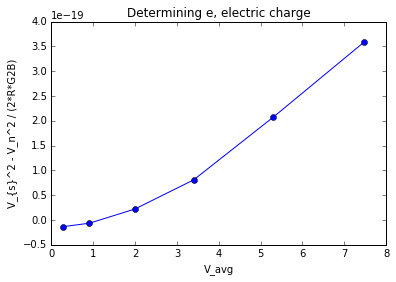

In [4]:
# plotting 

print(V_avg)
plt.plot(x_axis, y_axis, '-o')
plt.ylabel("V_{s}^2 - V_n^2 / (2*R*G2B)")
plt.xlabel("V_avg")
plt.title("Determining e, electric charge")

In [5]:
# coeffients for line of best fit 

coeffs = np.polyfit(x_axis, y_axis, 1, full = True)
e = -1.602176565e-19
print("accepted value:", e)
print("e charge estimate:", coeffs[0][0])

accepted value: -1.602176565e-19
e charge estimate: 5.2547921574052956e-20


## Adding in error bars 

| $$V_{av} \text{(V)}$$|$$R \text{(k}\Omega\text{)}$$| $$V_{rms}\text{(V)}$$ | $$V_{n} (mV)$$| $$light (V)$$|    $$g^2$$   |
|----------------------|--------------------|------------------------|----------------------|---------------|-----------------------|
| $0.273$$\pm$$0.001$|                  |$0.1541$$\pm$$0.0009$|                       |      $0.9$      |$2.136$$\times$$10^{12}$ | 
| $0.911$$\pm$$0.001$|                  |$0.2479$$\pm$$0.0017$|                       |      $1.2$      |$1.978$$\times$$10^{12}$ |
| $1.994$$\pm$$0.001$| $99.4$$\pm$$0.1$ |$0.3480$$\pm$$0.0024$|$0.07887$$\pm$$0.00052$|      $1.5$      |$1.910$$\times$$10^{12}$ | 
| $3.40$$\pm$$0.01$  |                  |$0.4384$$\pm$$0.0037$|                       |      $1.8$      |$1.906$$\times$$10^{12}$ |   
| $5.30$$\pm$$0.01$  |                  |$0.5343$$\pm$$0.0055$|                       |      $2.1$      |$1.826$$\times$$10^{12}$ | 
| $7.47$$\pm$$0.01$  |                  |$0.6022$$\pm$$0.0057$|                       |      $2.4$      |$1.757$$\times$$10^{12}$ | 

In [6]:
# Data 
V_avg = [0.273, 0.911, 1.994, 3.40, 5.30, 7.47]    #in volts
V_s = [.1541, .2479, .3480, .4384, .5343, .6022]   #in volts 
G2B = [2.136e12, 1.978e12, 1.910e12, 1.906e12, 1.826e12, 1.757e12]
R = 99.4 * 1000 # from kiloohms to ohms 
V_n = .07887 # in volts
dV_avg = [0.001, 0.001, 0.001, 0.01, 0.01, 0.01]
dV_s = [0.0009, 0.0017, 0.0024, 0.0037, 0.0055, 0.0057]
dR = 0.1
dV_n = 0.00052

In [7]:
# Calculating error in f 

# Adding error with multiple variables with respect to eV_avg

def error_f(Vs, Vn, R, dVs, dVn, dR, g2):
    '''
    returns the error of the boltzmann constant k 
    '''
    dfdR = -(Vs**2 - Vn**2) / (2*(R**2)*g2)
    dfdVs = (2*Vs) / (2*R*g2)
    dfdVn = -(2*Vn) / (2*R*g2)
    
    term1 = dfdR**2 * dR**2
    term2 = dfdVs**2 * dVs**2
    term3 = dfdVn**2 * dVn**2
    
    sum_of_terms = term1 + term2 + term3
    square_of_sums = np.sqrt(sum_of_terms)
    error_f = square_of_sums
    return error_f 

In [8]:
errors_in_f = []

for i in range(len(V_s)):
    f_error = error_f(V_s[i], V_n, R, dV_s[i], dV_n, dR, G2B[i])
    errors_in_f.append(f_error)
    
print(errors_in_f)

[6.811791891350055e-22, 2.1535731314315237e-21, 4.4044705421361195e-21, 8.56449502471189e-21, 1.6192093294382745e-20, 1.9655697454377216e-20]


In [9]:
import matplotlib
%precision %g
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['savefig.dpi'] = 120
matplotlib.rcParams['figure.dpi'] = 120
%matplotlib inline

5.2547921574052956e-20
-6.114221123730952e-20
[ 5.25479216e-20 -6.11422112e-20]


(0, 8.5)

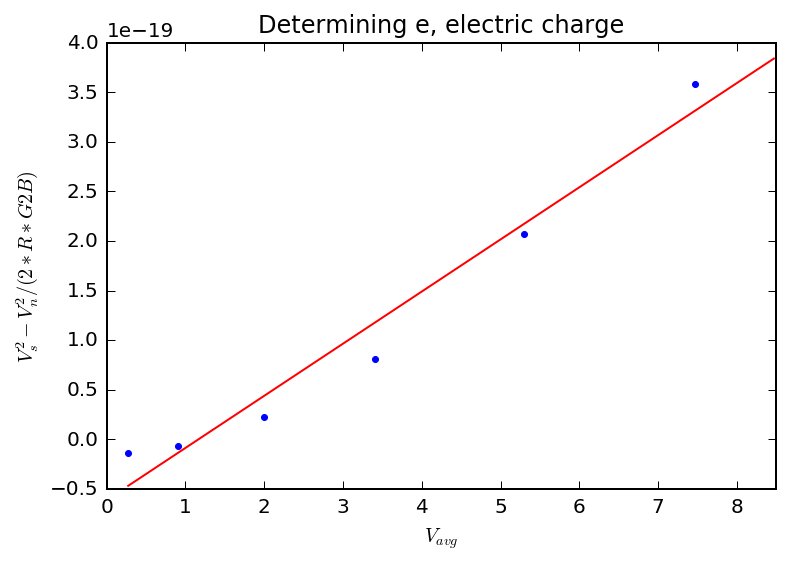

In [10]:
coeffs = np.polyfit(x_axis, y_axis, 1)
m = coeffs[0]
b = coeffs[1]
print(m)
print(b)
print(coeffs)

p = np.poly1d(coeffs)
xp = np.linspace(x_axis[0], x_axis[-1]+1, 1000)
plt.plot(x_axis, y_axis, '.', xp, p(xp), 'r')
plt.ylabel("$V_{s}^2 - V_n^2 / (2*R*G2B)$")
plt.xlabel("$V_{avg}$")
plt.title("Determining e, electric charge")
plt.xlim(0, 8.5)

(0, 8.5)

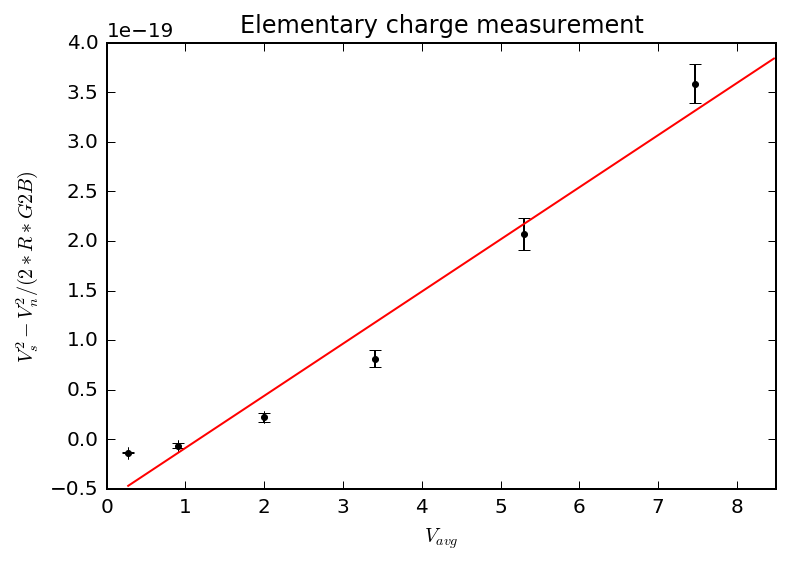

In [11]:
x_err = [0, 0, 0, 0, 0, 0]

# plot data with error
plt.errorbar(x_axis, y_axis, xerr=x_err, yerr=errors_in_f, fmt = '.', color = 'black')

# plot line of best fit 
plt.plot(xp, p(xp), 'r-')

# add labels and limits 
plt.ylabel("$V_{s}^2 - V_n^2 / (2*R*G2B)$")
plt.xlabel("$V_{avg}$")
plt.title("Elementary charge measurement")
plt.xlim(0, 8.5)

In [12]:
# Determining the error on e 

In [13]:
# Adding error with multiple variables 

def error_e(V_s, V_n, R, V_avg, dV_s, dV_n, dR, dV_avg, g2):
    '''
    returns the error of the electric charge
    '''
    dfdV_avg = -(V_s**2 - V_n**2) / (2*(V_avg**2)*R*g2)
    dfdR = -(V_s**2 - V_n**2) / (2*(R**2)*g2)
    dfdV_s = (2*V_s) / (2*R*V_avg*g2)
    dfdV_n = -(2*V_n) / (2*R*V_avg*g2)
    
    term1 = dfdV_avg**2 * dV_avg**2
    term2 = dfdR**2 * dR**2
    term3 = dfdV_s**2 * dV_s**2
    term4 = dfdV_n**2 * dV_n**2
    
    sum_of_terms = term1 + term2 + term3 + term4
    square_of_sums = np.sqrt(sum_of_terms)
    error_f = square_of_sums
    return error_f 


| $$V_{av} \text{(V)}$$|$$R \text{(k}\Omega\text{)}$$| $$V_{rms}\text{(V)}$$ | $$V_{n} (mV)$$| $$light (V)$$|    $$g^2$$   |
|----------------------|--------------------|------------------------|----------------------|---------------|-----------------------|
| $0.273$$\pm$$0.001$|                  |$0.1541$$\pm$$0.0009$|                       |      $0.9$      |$2.136$$\times$$10^{12}$ | 
| $0.911$$\pm$$0.001$|                  |$0.2479$$\pm$$0.0017$|                       |      $1.2$      |$1.978$$\times$$10^{12}$ |
| $1.994$$\pm$$0.001$| $99.4$$\pm$$0.1$ |$0.3480$$\pm$$0.0024$|$0.07887$$\pm$$0.00052$|      $1.5$      |$1.910$$\times$$10^{12}$ | 
| $3.40$$\pm$$0.01$  |                  |$0.4384$$\pm$$0.0037$|                       |      $1.8$      |$1.906$$\times$$10^{12}$ |   
| $5.30$$\pm$$0.01$  |                  |$0.5343$$\pm$$0.0055$|                       |      $2.1$      |$1.826$$\times$$10^{12}$ | 
| $7.47$$\pm$$0.01$  |                  |$0.6022$$\pm$$0.0057$|                       |      $2.4$      |$1.757$$\times$$10^{12}$ | 

In [14]:
# Data 
V_avg = [0.273, 0.911, 1.994, 3.40, 5.30, 7.47]    #in volts
V_s = [.1541, .2479, .3480, .4384, .5343, .6022]   #in volts 
G2B = [2.136e12, 1.978e12, 1.910e12, 1.906e12, 1.826e12, 1.757e12]
R = 99.4 * 1000 # from kiloohms to ohms 
V_n = .07887 # in volts
dV_avg = [0.001, 0.001, 0.001, 0.01, 0.01, 0.01]
dV_s = [0.0009, 0.0017, 0.0024, 0.0037, 0.0055, 0.0057]
dR = 0.1
dV_n = 0.00052

In [15]:
errors_in_e = []

for i in range(len(V_s)):
    e_error = error_e(V_s[i], V_n, R, V_avg[i], dV_s[i], dV_n, dR, dV_avg[i], G2B[i])
    errors_in_e.append(e_error)
    
print(errors_in_e)

[2.5558795656453546e-21, 2.370017104131948e-21, 2.2101722244924485e-21, 2.5545000197026616e-21, 3.0673621561847765e-21, 2.6376317952949678e-21]


The list above is a list of the errors in $e$ for each measurement. In order to calculate the error on $e$ across all measurements, we use the following formula: 

$$ \sigma_e = \sqrt{\frac{1}{N} \sum_{i=1}^{N} \delta e_{i}^2}$$ 

In [16]:
test0 = np.square(errors_in_e)
test1 = sum(test0)
test2 = test1 / len(errors_in_e)
test3 = np.sqrt(test2)
print(test0)
print(test1)
print(test2)
print("de = ", test3)

[6.53252035e-42 5.61698107e-42 4.88486126e-42 6.52547035e-42
 9.40871060e-42 6.95710149e-42]
3.992564512528574e-41
6.654274187547624e-42
de =  2.5795879879445136e-21


## New measurements after taking new Gain integral

| $$V_{av} \text{(V)}$$|$$R \text{(k}\Omega\text{)}$$| $$V_{rms}\text{(V)}$$ | $$V_{n} (mV)$$| $$light (V)$$|  $$g^2$$   |
|--------------|--------------|-----------------|---------|---------------|--------------------|
| $0.273$$\pm$$0.001$| |$0.1541$$\pm$$0.0009$|  |$0.9$ |$3.03089$$\times$$10^{12}$$\pm$$0.38486$$\times$$10^{12}$ | 
| $0.911$$\pm$$0.001$ | | $0.2479$$\pm$$0.0017$| | $1.2$ | $2.96376$$\times$$10^{12}$$\pm$$0.38486$$\times$$10^{12}$ |
| $1.994$$\pm$$0.001$| $99.4$$\pm$$0.1$ |$0.3480$$\pm$$0.0024$|$0.07887$$\pm$$0.00052$|$1.5$ |$2.86114$$\times$$10^{12}$$\pm$$0.38486$$\times$$10^{12}$ |
| $3.40$$\pm$$0.01$| |$0.4384$$\pm$$0.0037$| |$1.8$|$2.78599$$\times$$10^{12}$$\pm$$0.38486$$\times$$10^{12}$ |
| $5.30$ $\pm$$0.01$  | |$0.5343$$\pm$$0.0055$|   |   $2.1$   |$2.7013$$\times$$10^{12}$$\pm$$0.38486$$\times$$10^{12}$ | 
| $7.47$$\pm$$0.01$  |  |$0.6022$$\pm$$0.0057$| |      $2.4$      |$2.54399$$\times$$10^{12}$$\pm$$0.38486$$\times$$10^{12}$ | 

$$\text{Table ??: RMS voltage and average voltage for measuring elementary charge}$$

In [17]:
# Data 
V_avg = [0.273, 0.911, 1.994, 3.40, 5.30, 7.47]    #in volts
V_s = [.1541, .2479, .3480, .4384, .5343, .6022]   #in volts 
#G2B = [2.136e12, 1.978e12, 1.910e12, 1.906e12, 1.826e12, 1.757e12]
G2B = [3.03089e12, 2.96376e12, 2.86114e12, 2.78599e12, 2.7013e12, 2.54399e12]
R = 99.4 * 1000 # from kiloohms to ohms 
V_n = .07887    # in volts

# Error on data 
dV_avg = [0.001, 0.001, 0.001, 0.01, 0.01, 0.01]        # in volts
dV_s = [0.0009, 0.0017, 0.0024, 0.0037, 0.0055, 0.0057] # in volts 
dG2B = 0.38486e12 
dR = 0.1 * 1000 # from kilohms to ohms 
dV_n = 0.00052  # in volts 

In [18]:
# stuff for plotting 

y_axis = []
x_axis = []

for i in range(len(V_s)):
    y_point = (V_s[i]**2 - V_n**2) / (2*R*G2B[i])
    y_axis.append(y_point)

for i in range(len(V_avg)):
    x_point = V_avg[i]
    x_axis.append(x_point)

[0.273, 0.911, 1.994, 3.4, 5.3, 7.47]


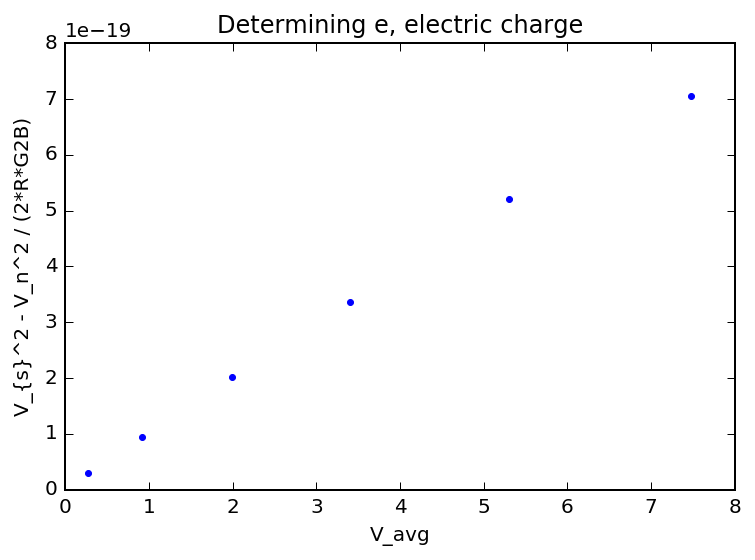

In [19]:
# plotting 

print(V_avg)
plt.plot(x_axis, y_axis, '.')
plt.ylabel("V_{s}^2 - V_n^2 / (2*R*G2B)")
plt.xlabel("V_avg")
plt.title("Determining e, electric charge")

In [20]:
# Calculating error in f 

# Adding error with multiple variables with respect to eV_avg

def error_f(Vs, Vn, R, G2B, dVs, dVn, dR, dG2B):
    '''
    returns the error on eV_avg
    '''
    dfdR = -(Vs**2 - Vn**2) / (2*(R**2)*G2B)
    dfdVs = (2*Vs) / (2*R*G2B)
    dfdVn = -(2*Vn) / (2*R*G2B)
    dfdG2B = -(Vs**2 - Vn**2) / (2*R*G2B**2)
    
    term1 = dfdR**2 * dR**2
    term2 = dfdVs**2 * dVs**2
    term3 = dfdVn**2 * dVn**2
    term4 = dfdG2B**2 * dG2B **2
    
    sum_of_terms = term1 + term2 + term3 +term4 
    square_of_sums = np.sqrt(sum_of_terms)
    error_f = square_of_sums
    return error_f 

In [21]:
errors_in_f = []

for i in range(len(V_s)):
    f_error = error_f(V_s[i], V_n, R, G2B[i], dV_s[i], dV_n, dR, dG2B)
    errors_in_f.append(f_error)
    
print(errors_in_f)

[3.7246731849413726e-21, 1.2258161923973762e-20, 2.732791225276348e-20, 4.675505300200073e-20, 7.489319777872864e-20, 1.0747925406197654e-19]


In [22]:
print("y-axis --- ", y_axis)
print()
print("x-axis --- ", x_axis)
print()
print("y-axis error --- ", errors_in_f)

y-axis ---  [2.90873734367311e-20, 9.374466407998021e-20, 2.019771577239498e-19, 3.357812897362712e-19, 5.200119629039181e-19, 7.047508402313851e-19]

x-axis ---  [0.273, 0.911, 1.994, 3.4, 5.3, 7.47]

y-axis error ---  [3.7246731849413726e-21, 1.2258161923973762e-20, 2.732791225276348e-20, 4.675505300200073e-20, 7.489319777872864e-20, 1.0747925406197654e-19]


After running it through the ROOT code, we get: 

$$ e = 0.8747 \times 10^{-19} \pm 6.502 \times 10^{-21}$$ 

In [35]:
exp = 0.8747e-19
accepted = 1.60217e-19
error = 6.502e-21
exp_diff = abs(exp - accepted)
sigma = 11.5
print("We are within", sigma, "sigma of the mean:", exp_diff < (sigma)*error)

We are within 11.5 sigma of the mean: True
